In [0]:
# SWICH RUNTIME TO GPU

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import sklearn.metrics
import seaborn as sns

np.random.seed(42)

# **Neurons are the basic building blocks of Neural Networks**

Usually a neural network has thousands or millions of neurons, but let's for now work with a network that has only one.

<img src="https://drive.google.com/uc?export=view&id=1NEd7WQrLTUzAPz44t6bUEma02LH4GOT3" height='250px' />

$
x_1 - \text{Input} \\
ŷ_1 - \text{Output} \\
$

$
z_1 = w_1 \cdot x_1 + b_1 \\
w_1 - \text{Weight for the first input} \\
b_1 - \text{Bias term for this neuron} \\
z_1 - \text{The linear combination of the inputs and weights + bias} \\
$

$
\theta = \{w, b\} \\
\theta - \text{Parameters of the model/network} \\
$

$
ŷ_1 = f(z_1) \\
f - \text{The activation function} \\
$




# **Activation functions**

Linear:

$f(z) = z$

---
Step:

$f(z) = \begin{cases}
    1,& \text{if } z > 0\\
    0,              & z \le 0
\end{cases}$

---
Sigmoid:

$f(z) = \frac{1}{1 + e^{-z}}$

---
tanh:

$f(z) = tanh(z) = \frac{1 - e^{-z}}{1 + e^{-z}}$

---
ReLU:

$f(z) = max(0, z)$



In [0]:
def step(z):
  return np.array(z > 0, dtype=np.int32)

def tanh(z):
  return np.tanh(z)

def sigmoid(z):
  # TODO
  return 1 / (1 + np.exp(-z))

def relu(z):
  # TODO
  return np.maximum(0, z)

In [0]:
def plot(z, yh, name):
  plt.grid(True)
  plt.xlabel('z')
  plt.ylabel('ŷ')
  plt.plot(z, yh, label=name, color='b')
  plt.axhline(0, color='orange')
  plt.axvline(0, color='orange')
  plt.legend()
  plt.show()

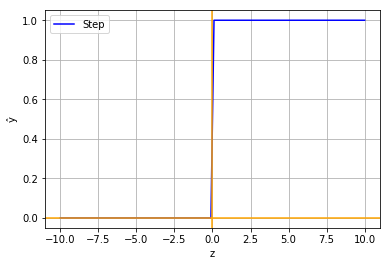

In [0]:
z = np.linspace(-10, 10, 100)

yh = step(z)
plot(z, yh, 'Step')

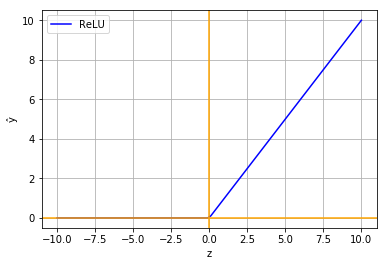

In [0]:
yh = relu(z)
plot(z, yh, 'ReLU')

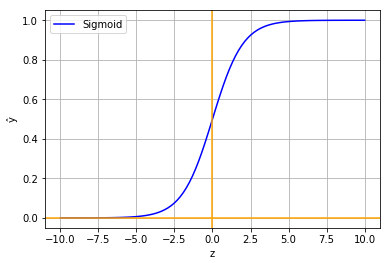

In [0]:
yh = sigmoid(z)
plot(z, yh, 'Sigmoid')

# **An example of an oversimplified problem that can be solved using NN**

Our input is outside temperature which is a value between -30 and 40. We want our NN to predict is it hot or cold outside. This is an example of supervised ML using NN.

Let's encode the output values as:

$
hot   -  1 \\
cold - 0
$

---

$
D = \{\\
(-4, 0), \\
(1, 0),\\
(25, 1),\\
...\}
$

---

In [0]:
# Let's generate a dataset
x = np.random.randint(-30, 40, 1000)
y = np.array([1 if v > 20 else 0 for v in x])
for i in range(10):
  print("If the temperature is {:4} it is  {}".format(x[i], "hot" if y[i] == 1 else "cold"))

If the temperature is   21 it is  hot
If the temperature is  -16 it is  cold
If the temperature is   30 it is  hot
If the temperature is  -10 it is  cold
If the temperature is   -7 it is  cold
If the temperature is  -28 it is  cold
If the temperature is   -9 it is  cold
If the temperature is   22 it is  hot
If the temperature is  -29 it is  cold
If the temperature is   -1 it is  cold


# Initialize the parameters

<img src="https://drive.google.com/uc?export=view&id=1NEd7WQrLTUzAPz44t6bUEma02LH4GOT3" height='250px' />

The first thing we need to do is initialize the parameters of our NN. In our case we only have two parameters $w_1$ and $b_1$. Usually a random valaue between -1 and 1 is assigned to both. 

In [0]:
#Set seed, so that we always have the same result
np.random.seed(13)

# TODO: Initialize the parameters
w1 = np.random.uniform(-1, 1)
b1 = np.random.uniform(-1, 1)
print(w1, b1)

0.5554048211476403 -0.5249175599301754


$
z_1 = w_1 \cdot x_1 + b_1 \\
ŷ_1 = f(z_1) \\
$

Calculate the outputs, set sigmoid as the activation function.

In [0]:
#TODO 
# Forward pass - get the predictions
z1 = w1*x + b1 #?
yh = sigmoid(z1) #?
print(z1[0:3])
print()
print(yh[0:3])

[11.13858368 -9.4113947  16.13722707]

[9.99985460e-01 8.17801113e-05 9.99999902e-01]


In [0]:
# Decode the outputs hot/cold
yh_temp = ['hot' if val > 0.5 else 'cold' for val in yh]

In [0]:
# Print the first 10 g.t. and predictions
for i in range(10):
  print("If the temperature is {:4} it is  {:4}  vs predicted  {}".format(
      x[i], "hot" if y[i] == 1 else "cold", yh_temp[i]))

If the temperature is   21 it is  hot   vs predicted  hot
If the temperature is  -16 it is  cold  vs predicted  cold
If the temperature is   30 it is  hot   vs predicted  hot
If the temperature is  -10 it is  cold  vs predicted  cold
If the temperature is   -7 it is  cold  vs predicted  cold
If the temperature is  -28 it is  cold  vs predicted  cold
If the temperature is   -9 it is  cold  vs predicted  cold
If the temperature is   22 it is  hot   vs predicted  hot
If the temperature is  -29 it is  cold  vs predicted  cold
If the temperature is   -1 it is  cold  vs predicted  cold


# Cost function / Loss function / Error function

Cross entropy loss is defined as:

$
L = -\frac{1}{N}\sum_i y_i log(\hat{y}_i) + (1-y_i)log(1-\hat{y}_i) \\
$



$
N - \text{Number of examples in our training set} \\
y_i - \text{The ground truth} \\
\hat{y}_i - \text{The predicted value}\\
$

---
$
y = 1 = hot \\
yh = 0.3 = cold \\
L = -1 \cdot log(0.3) + (1 - 1)log(1-0.3) = -log(0.3) = 1.2 \\
$

$
y = 1 = hot \\
yh = 0.9 = hot \\
L = -1 \cdot log(0.9) + (1 - 1)log(1-0.9) = -log(0.9) = 0.1 \\
$

$
y = 1 = hot \\
yh = 0.01 = cold \\
L = -1 \cdot log(0.01) + (1 - 1)log(1-0.01) = -log(0.01) = 4.6
$

In [0]:
# Calculate the loss
loss = sklearn.metrics.log_loss(y, yh)
print(loss)

1.5132751944613916


# **1. Prepare the dataset**

In [0]:
device = torch.device('cpu')

# The whole dataset
print(x[0:10])
print(y[0:10])
print()
# Print the size
print("The size of our dataset is: " + str(x.size))

[ 21 -16  30 -10  -7 -28  -9  22 -29  -1]
[1 0 1 0 0 0 0 1 0 0]

The size of our dataset is: 1000




---


**Generate a train/test/dev dataset**

In [0]:
inds = np.random.permutation(len(x))
inds_train = inds[0:int(0.8*len(x))]
inds_test = inds[int(0.8*len(x)):int(0.9*len(x))]
inds_dev = inds[int(0.9*len(x)):]

# 80% of the dataset
x_train = x[inds_train]
y_train = y[inds_train]

# 10% of the dataset
x_test = x[inds_test]
y_test = y[inds_test]

# 10% of the dataset
x_dev = x[inds_dev]
y_dev = y[inds_dev]



---


**Convert the inputs to PyTorch**

In [0]:
x_train = torch.tensor(x_train.reshape(-1, 1), dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

x_dev = torch.tensor(x_dev.reshape(-1, 1), dtype=torch.float32)
y_dev = torch.tensor(y_dev.reshape(-1, 1), dtype=torch.float32)

x_test = torch.tensor(x_test.reshape(-1, 1), dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Build the Neural Network

In [0]:
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(1, 1)
      
    def forward(self, x):
      x = torch.sigmoid(self.fc1(x))
      return x



# Initialize the NN

We also create the criterion (loss function) and the optimizer

In [0]:
net = Net()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.999)

In [0]:
print(net.fc1.weight)
print(net.fc1.bias)

Parameter containing:
tensor([[0.3350]], requires_grad=True)
Parameter containing:
tensor([-0.3455], requires_grad=True)


# Train

In [0]:
net.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)

x_dev = x_dev.to(device)
y_dev = y_dev.to(device)

net.train()
losses = []
accs = []
ws = []
bs = []
for epoch in range(10000):  # do 200 epoch 
  # zero the gradients
  optimizer.zero_grad()

  # Forward 
  outputs = net(x_train)
  # Calculate error
  loss = criterion(outputs, y_train)
  # Backward
  loss.backward()
  # Optimize/Update parameters
  optimizer.step()
  
  # Track the changes - This is normally done using tensorboard or similar
  losses.append(loss.item())
  accs.append(sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy()))
  ws.append(net.fc1.weight.cpu().detach().numpy()[0][0])
  bs.append(net.fc1.bias.cpu().detach().numpy()[0])

  # print statistics
  if epoch % 500 == 0:
      acc = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy())
      
      outputs_dev = net(x_dev)
      acc_dev = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs_dev.cpu().detach().numpy()], y_dev.cpu().numpy())
      
      print("Epoch: {:4} Loss: {:.5f} Acc: {:.3f} Acc Dev: {:.3f}".format(epoch, loss.item(), acc, acc_dev))

print('Finished Training')

Epoch:    0 Loss: 0.96080 Acc: 0.733 Acc Dev: 0.750
Epoch:  500 Loss: 0.40167 Acc: 0.840 Acc Dev: 0.890
Epoch: 1000 Loss: 0.25671 Acc: 0.884 Acc Dev: 0.900
Epoch: 1500 Loss: 0.13343 Acc: 0.936 Acc Dev: 0.940
Epoch: 2000 Loss: 0.09794 Acc: 0.953 Acc Dev: 0.950
Epoch: 2500 Loss: 0.08060 Acc: 0.969 Acc Dev: 0.980
Epoch: 3000 Loss: 0.05185 Acc: 0.981 Acc Dev: 1.000
Epoch: 3500 Loss: 0.05489 Acc: 0.976 Acc Dev: 0.970
Epoch: 4000 Loss: 0.04637 Acc: 1.000 Acc Dev: 1.000
Epoch: 4500 Loss: 0.04804 Acc: 0.981 Acc Dev: 1.000
Epoch: 5000 Loss: 0.04523 Acc: 0.976 Acc Dev: 0.970
Epoch: 5500 Loss: 0.04331 Acc: 1.000 Acc Dev: 1.000
Epoch: 6000 Loss: 0.04297 Acc: 1.000 Acc Dev: 1.000
Epoch: 6500 Loss: 0.04264 Acc: 1.000 Acc Dev: 1.000
Epoch: 7000 Loss: 0.04208 Acc: 1.000 Acc Dev: 1.000
Epoch: 7500 Loss: 0.04153 Acc: 1.000 Acc Dev: 1.000
Epoch: 8000 Loss: 0.04107 Acc: 1.000 Acc Dev: 1.000
Epoch: 8500 Loss: 0.04067 Acc: 1.000 Acc Dev: 1.000
Epoch: 9000 Loss: 0.04032 Acc: 1.000 Acc Dev: 1.000
Epoch: 9500 

# Plot Everything

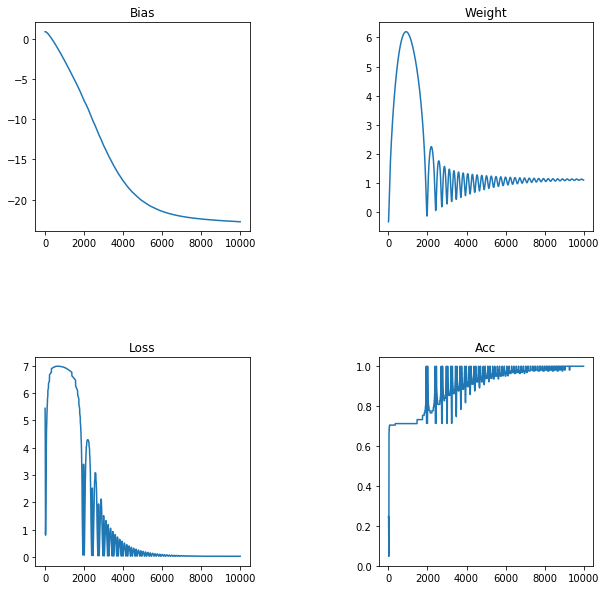

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
fig.set_size_inches(10, 10)
plt.subplot(2, 2, 1)
sns.lineplot(np.arange(0, len(bs)), bs).set_title("Bias")

plt.subplot(2, 2, 2)
sns.lineplot(np.arange(0, len(ws)), ws).set_title("Weight")

# TODO: Add two plots for the Loss and Accuracy, place them in the right positions
plt.subplot(2, 2, 3)
sns.lineplot(np.arange(0, len(losses)), losses).set_title("Loss")

plt.subplot(2, 2, 4)
sns.lineplot(np.arange(0, len(accs)), accs).set_title("Acc")
fig.show()

# Let's do multiple layers

In [0]:
#TODO - Create a network with 3 Layers for each use sigmoid as activation:
#L1 - 4 Neurons
#L2 - 3 Neurons
#L3 - 1 Neuron

#Add sigmod as the activation function
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(1, 4)
      self.fc2 = nn.Linear(4, 3)
      self.fc3 = nn.Linear(3, 1)
      
    def forward(self, x):
      x = torch.sigmoid(self.fc1(x))
      x = torch.sigmoid(self.fc2(x))
      x = torch.sigmoid(self.fc3(x))
      return x

In [0]:
net = Net()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.999)

In [0]:
print(net.fc2.weight)

Parameter containing:
tensor([[-0.2609,  0.2314,  0.1678,  0.0864],
        [-0.2176, -0.1254,  0.0463, -0.0212],
        [-0.2402, -0.2816, -0.0515, -0.2998]], requires_grad=True)


In [0]:
net.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)
net.train()
losses = []
accs = []
ws = []
bs = []
for epoch in range(10000):  # do 200 epoch 
  # zero the gradients
  optimizer.zero_grad()

  # Forward 
  outputs = net(x_train)
  # Calculate error
  loss = criterion(outputs, y_train)
  # Backward
  loss.backward()
  # Optimize/Update parameters
  optimizer.step()
  
  # Track the changes - This is normally done using tensorboard or similar
  losses.append(loss.item())
  accs.append(sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy()))
  ws.append(net.fc1.weight.cpu().detach().numpy()[0][0])
  bs.append(net.fc1.bias.cpu().detach().numpy()[0])

  # print statistics
  if epoch % 500 == 0:
      acc = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy())
      print("Epoch: {:4} Loss: {:.5} Acc: {:.3}".format(epoch, loss.item(), acc))

print('Finished Training')

Epoch:    0 Loss: 0.63467 Acc: 0.714
Epoch:  500 Loss: 0.59272 Acc: 0.714
Epoch: 1000 Loss: 0.5113 Acc: 0.714
Epoch: 1500 Loss: 0.41902 Acc: 0.714
Epoch: 2000 Loss: 0.37628 Acc: 0.777
Epoch: 2500 Loss: 0.31089 Acc: 0.863
Epoch: 3000 Loss: 0.20294 Acc: 0.939
Epoch: 3500 Loss: 0.12557 Acc: 0.976
Epoch: 4000 Loss: 0.081937 Acc: 1.0
Epoch: 4500 Loss: 0.055152 Acc: 1.0
Epoch: 5000 Loss: 0.039423 Acc: 1.0
Epoch: 5500 Loss: 0.030431 Acc: 1.0
Epoch: 6000 Loss: 0.025533 Acc: 1.0
Epoch: 6500 Loss: 0.022337 Acc: 1.0
Epoch: 7000 Loss: 0.020122 Acc: 1.0
Epoch: 7500 Loss: 0.018523 Acc: 1.0
Epoch: 8000 Loss: 0.017227 Acc: 1.0
Epoch: 8500 Loss: 0.016194 Acc: 1.0
Epoch: 9000 Loss: 0.015325 Acc: 1.0
Epoch: 9500 Loss: 0.014577 Acc: 1.0
Finished Training


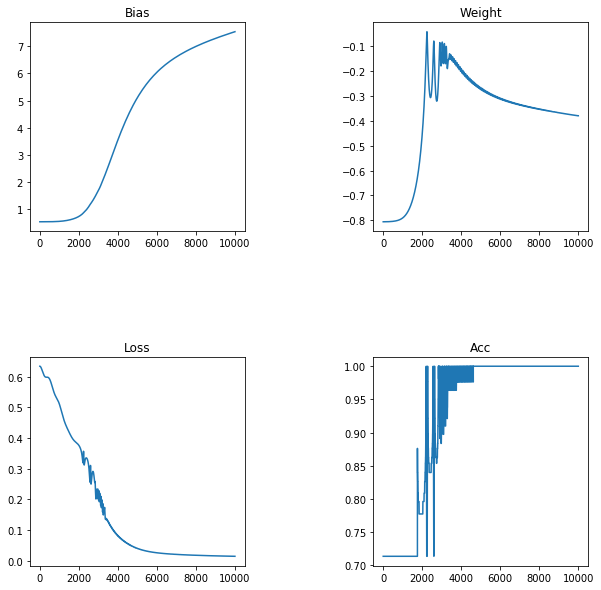

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
fig.set_size_inches(10, 10)
plt.subplot(2, 2, 1)
sns.lineplot(np.arange(0, len(bs)), bs).set_title("Bias")

plt.subplot(2, 2, 2)
sns.lineplot(np.arange(0, len(ws)), ws).set_title("Weight")

plt.subplot(2, 2, 3)
sns.lineplot(np.arange(0, len(losses)), losses).set_title("Loss")

plt.subplot(2, 2, 4)
sns.lineplot(np.arange(0, len(accs)), accs).set_title("Acc")
fig.show()